In [1]:
import pandas as pd
import numpy as np

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

import os
#print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'matplotlib'

In [16]:
import io
import requests
from io import StringIO
train = pd.read_table(r"https://github.com/HENRY-JERRY/PropaSale/blob/main/house_pricing.csv")
train.head()

,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."
1,<head>
2,"<meta charset=""utf-8"">"
3,"<link rel=""dns-prefetch"" href=""https://githu..."
4,"<link rel=""dns-prefetch"" href=""https://avata..."


In [8]:
df

,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."
1,<head>
2,"<meta charset=""utf-8"">"
3,"<link rel=""dns-prefetch"" href=""https://github...."
4,"<link rel=""dns-prefetch"" href=""https://avatars..."
...,...
110337,</clipboard-copy>
110338,</div>
110339,</template>
110340,</body>


## Training dataset

In [2]:
train = pd.read_csv("house_pricing.csv")

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1300, 81)

## Testing dataset

In [5]:
test = pd.read_csv("house_pricing_test.csv")

In [6]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1301,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
1,1302,70,RL,NaN,7500,Pave,NaN,IR1,Bnk,AllPub,...,224,0,NaN,NaN,NaN,0,11,2009,WD,Normal
2,1303,60,RL,92.0,10120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal
3,1304,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
4,1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal


In [11]:
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])

In [12]:
test['Exterior1st'].value_counts()

VinylSd    70
MetalSd    22
Wd Sdng    18
HdBoard    18
Plywood    10
BrkFace     8
CemntBd     6
WdShing     3
AsbShng     2
Stucco      2
CBlock      1
Name: Exterior1st, dtype: int64

In [7]:
test.shape

(160, 80)

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1300 rows and 81 columns
Test has 160 rows and 80 columns


In [18]:
# gives us statistical info about the numerical variables. 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1300.0,650.500000,375.421985,1.0,325.75,650.5,975.25,1300.0
MSSubClass,1300.0,57.057692,42.466041,20.0,20.00,50.0,70.00,190.0
LotFrontage,1071.0,70.198880,24.622546,21.0,59.00,70.0,80.00,313.0
LotArea,1300.0,10573.323077,10388.805901,1300.0,7590.00,9476.5,11616.00,215245.0
OverallQual,1300.0,6.102308,1.378766,1.0,5.00,6.0,7.00,10.0
OverallCond,1300.0,5.573846,1.118778,1.0,5.00,5.0,6.00,9.0
YearBuilt,1300.0,1971.293846,29.934696,1875.0,1954.00,1972.0,2000.00,2010.0
YearRemodAdd,1300.0,1984.676923,20.605879,1950.0,1966.00,1993.0,2004.00,2010.0
MasVnrArea,1292.0,104.372291,184.002576,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1300.0,446.273077,460.343454,0.0,0.00,385.5,712.25,5644.0


In [19]:
## Gives us information about the features. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1300 non-null   int64  
 1   MSSubClass     1300 non-null   int64  
 2   MSZoning       1300 non-null   object 
 3   LotFrontage    1071 non-null   float64
 4   LotArea        1300 non-null   int64  
 5   Street         1300 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1300 non-null   object 
 8   LandContour    1300 non-null   object 
 9   Utilities      1300 non-null   object 
 10  LotConfig      1300 non-null   object 
 11  LandSlope      1300 non-null   object 
 12  Neighborhood   1300 non-null   object 
 13  Condition1     1300 non-null   object 
 14  Condition2     1300 non-null   object 
 15  BldgType       1300 non-null   object 
 16  HouseStyle     1300 non-null   object 
 17  OverallQual    1300 non-null   int64  
 18  OverallC

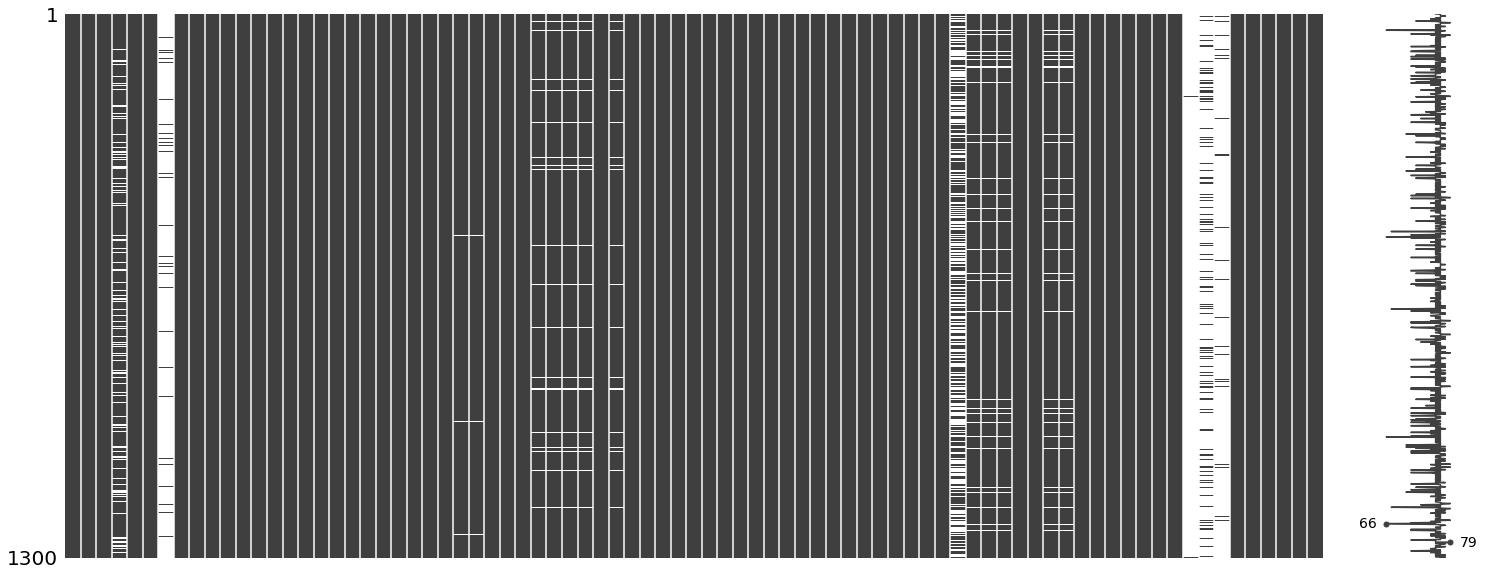

In [23]:
msno.matrix(train);

In [24]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
PoolQC,1295,99.62
MiscFeature,1249,96.08
Alley,1223,94.08
Fence,1050,80.77
FireplaceQu,618,47.54
LotFrontage,229,17.62
GarageYrBlt,72,5.54
GarageFinish,72,5.54
GarageType,72,5.54
GarageQual,72,5.54


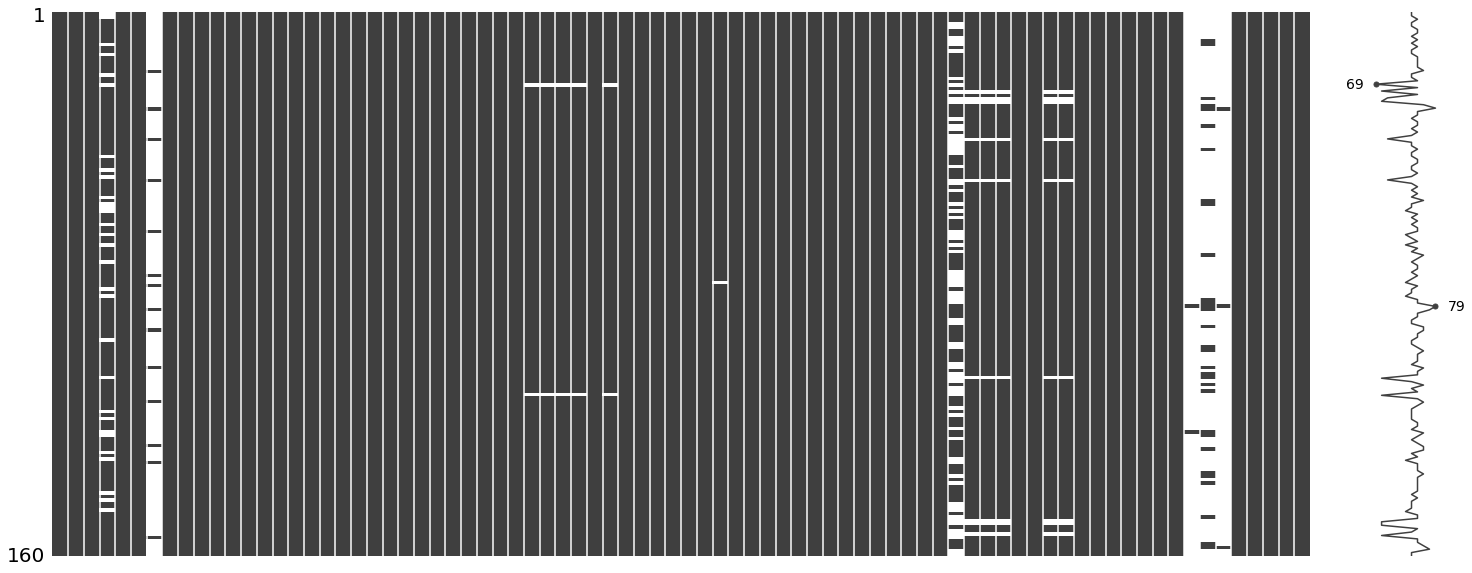

In [25]:
msno.matrix(test);

In [26]:
missing_percentage(test)

,Total,Percent
PoolQC,158,98.75
MiscFeature,157,98.12
Alley,146,91.25
Fence,129,80.62
FireplaceQu,72,45.00
LotFrontage,30,18.75
GarageQual,9,5.62
GarageCond,9,5.62
GarageFinish,9,5.62
GarageYrBlt,9,5.62


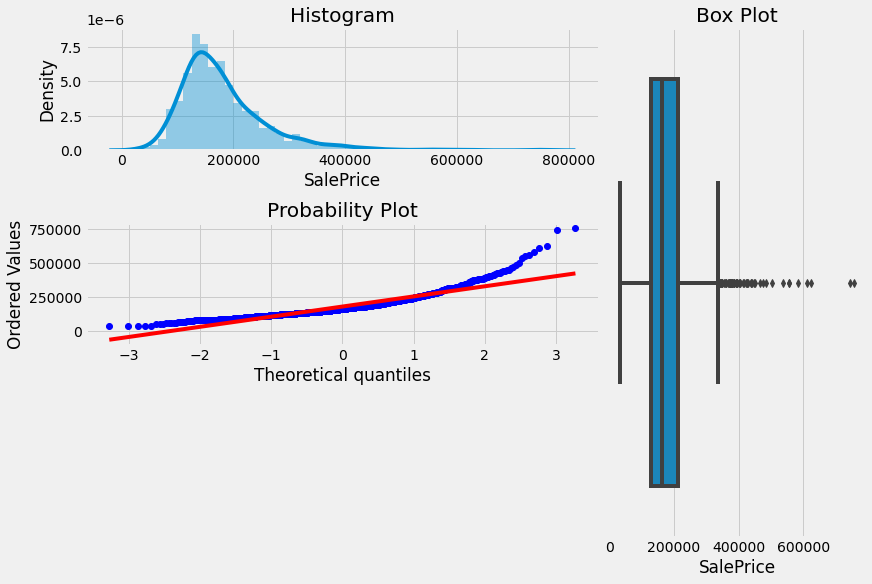

In [27]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

In [28]:
train.groupby(by=["MSZoning"]).sum()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
MSZoning,
C (all),745280
RH,2025934
FV,12419362
RM,23642169
RL,196445824
